In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_completo = pd.read_csv('events.csv')

c:\users\ignacio\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0,0.5,'Cantidad de usuarios')

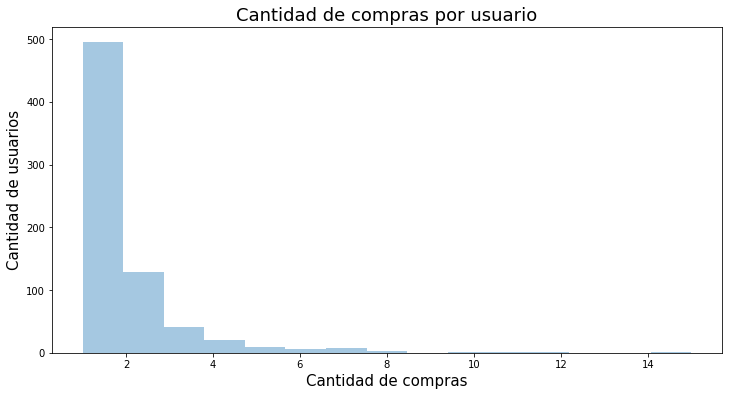

In [2]:
df_ventas = datos_completo.loc[datos_completo['event'] == 'conversion']
cant_ventas_por_cliente = df_ventas['person'].value_counts()
plt.subplots(figsize=(12,6))
bp = sns.distplot(cant_ventas_por_cliente, bins=15, kde=False)
bp.set_title("Cantidad de compras por usuario", fontsize=18)
bp.set_xlabel("Cantidad de compras", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

In [3]:
df_celulares = datos_completo.loc[datos_completo['device_type'] == 'Smartphone']
df_computadoras = datos_completo.loc[datos_completo['device_type'] == 'Computer']
df_tablets = datos_completo.loc[datos_completo['device_type'] == 'Tablet']
df_dispositivos = pd.DataFrame()
df_dispositivos = df_dispositivos.append([df_celulares, df_computadoras, df_tablets])
#Creamos un diccionario con {<person>:<dispositivo/os>}
dicc_persona_dispositivo = {}

def agregar_dispositivo_a_persona_dicc(fila):
    dispositivo = fila['device_type']
    agrega_a_dicc_elementos_persona(fila,dicc_persona_dispositivo,dispositivo)

def agrega_a_dicc_elementos_persona(fila, dicc, elemento):
    persona = fila['person']
    if(persona in dicc):
        if(dicc.get(persona) !=elemento):
            dicc[persona] = 'multi'
    else:
        dicc[persona] = elemento

def agregar_elemento_para_persona(fila, dicc):
    persona = fila['person']
    return dicc.get(persona, np.nan)

def agregar_dispositivo_para_persona(fila):
    return agregar_elemento_para_persona(fila, dicc_persona_dispositivo)

df_dispositivos.apply(agregar_dispositivo_a_persona_dicc,axis=1)
serie_dispositivos = datos_completo.apply(agregar_dispositivo_para_persona,axis=1)
pos_col_search = datos_completo.columns.get_loc('search_engine')
datos_completo.insert(pos_col_search+1, 'device_types', serie_dispositivos)

#Creamos un diccionario con {<person>:<so_computadora>} y otro {<person>:<so_celular>}
dicc_persona_so_computadoras = {}
dicc_persona_so_celulares = {}

def agregar_so_computadora_a_persona_dicc(fila):
    agregar_so_a_persona_dicc(fila, dicc_persona_so_computadoras)
    
def agregar_so_celular_a_persona_dicc(fila):
    agregar_so_a_persona_dicc(fila, dicc_persona_so_celulares)

def agregar_so_a_persona_dicc(fila, dicc):
    persona = fila['person']
    so = fila['operating_system_version']
    so_splited = so.split(' ')
    so_nombre = so_splited[0]
    agrega_a_dicc_elementos_persona(fila, dicc, so_nombre)
    
def agregar_so_computadora_para_persona(fila):
    return agregar_elemento_para_persona(fila, dicc_persona_so_computadoras)

def agregar_so_celular_para_persona(fila):
    return agregar_elemento_para_persona(fila, dicc_persona_so_celulares)

df_computadoras.apply(agregar_so_computadora_a_persona_dicc,axis=1)
df_celulares.apply(agregar_so_celular_a_persona_dicc,axis=1)
serie_so_computadora = datos_completo.apply(agregar_so_computadora_para_persona,axis=1)
serie_so_celular = datos_completo.apply(agregar_so_celular_para_persona,axis=1)
datos_completo.insert(pos_col_search+2, 'os_name_computer', serie_so_computadora)
datos_completo.insert(pos_col_search+2, 'os_name_smartphone', serie_so_celular)

serie_persona_dispositivo = pd.Series(dicc_persona_dispositivo)
serie_persona_so_computadora = pd.Series(dicc_persona_so_computadoras)
serie_persona_so_celular = pd.Series(dicc_persona_so_celulares)

In [5]:
dicc_persona_resolucion = {}

def max_str(l):
    if l[0] > l[1]:
        return l[0]
    return l[1]

def agregar_resolucion_a_persona_dicc(fila):
    dispositivo = max_str(fila['screen_resolution'].split('x'))
    agrega_a_dicc_elementos_persona(fila,dicc_persona_resolucion,dispositivo)

def agregar_resolucion_para_persona(fila):
    return agregar_elemento_para_persona(fila, dicc_persona_resolucion)
    
df_dispositivos.apply(agregar_resolucion_a_persona_dicc,axis=1)
serie_resolucion = datos_completo.apply(agregar_resolucion_para_persona,axis=1)
pos_col_search = datos_completo.columns.get_loc('search_engine')
datos_completo.insert(pos_col_search+1, 'resolution', serie_resolucion)

Text(0,0.5,'Cantidad de usuarios')

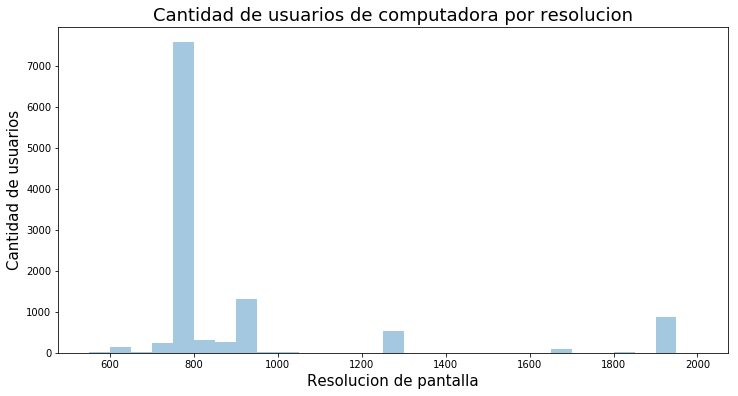

In [15]:
df_resoluciones_computadora = datos_completo.loc[(datos_completo['resolution'] != 'multi')]
df_resoluciones_computadora = df_resoluciones_computadora.loc[(df_resoluciones_computadora['device_types'] == 'Computer')]
df_resoluciones_computadora = df_resoluciones_computadora.drop_duplicates(subset='person')
res_por_persona = df_resoluciones_computadora['resolution'].astype(int)
plt.subplots(figsize=(12,6))
l_bins = []
for x in range(6,21):
    l_bins.append(x*100-50)
    l_bins.append(x*100)
bp = sns.distplot(res_por_persona, bins=l_bins, kde=False)
bp.set_title("Cantidad de usuarios de computadora por resolucion", fontsize=18)
bp.set_xlabel("Resolucion de pantalla", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

Text(0,0.5,'Cantidad de compras')

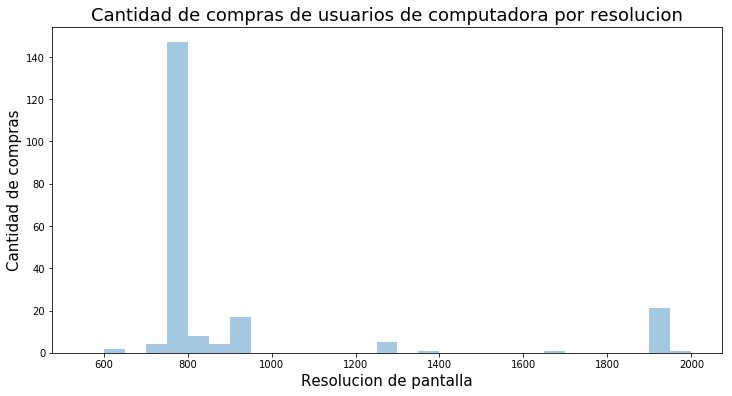

In [16]:
df_resoluciones_computadora = datos_completo.loc[(datos_completo['resolution'] != 'multi')]
df_resoluciones_computadora = df_resoluciones_computadora.loc[(df_resoluciones_computadora['device_types'] == 'Computer')]
df_resoluciones_computadora = df_resoluciones_computadora.loc[(df_resoluciones_computadora['event'] == 'conversion')]
df_resoluciones_computadora = df_resoluciones_computadora.drop_duplicates(subset='person')
res_por_persona = df_resoluciones_computadora['resolution'].astype(int)
plt.subplots(figsize=(12,6))
l_bins = []
for x in range(6,21):
    l_bins.append(x*100-50)
    l_bins.append(x*100)
bp = sns.distplot(res_por_persona, bins=l_bins, kde=False)
bp.set_title("Cantidad de compras de usuarios de computadora por resolucion", fontsize=18)
bp.set_xlabel("Resolucion de pantalla", fontsize=15)
bp.set_ylabel("Cantidad de compras", fontsize=15)

Text(0,0.5,'Cantidad de usuarios')

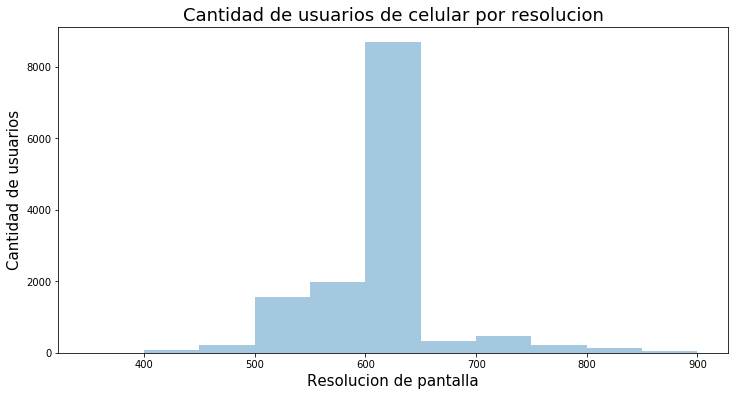

In [17]:
df_resoluciones_celular = datos_completo.loc[(datos_completo['resolution'] != 'multi')]
df_resoluciones_celular = df_resoluciones_celular.loc[(df_resoluciones_celular['device_types'] == 'Smartphone')]
df_resoluciones_celular = df_resoluciones_celular.drop_duplicates(subset='person')
res_por_persona = df_resoluciones_celular['resolution'].astype(int)
res_por_persona = res_por_persona[res_por_persona <= 1000]
plt.subplots(figsize=(12,6))
l_bins = []
for x in range(4,10):
    l_bins.append(x*100-50)
    l_bins.append(x*100)
bp = sns.distplot(res_por_persona, bins=l_bins, kde=False)
bp.set_title("Cantidad de usuarios de celular por resolucion", fontsize=18)
bp.set_xlabel("Resolucion de pantalla", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

Text(0,0.5,'Cantidad de compras')

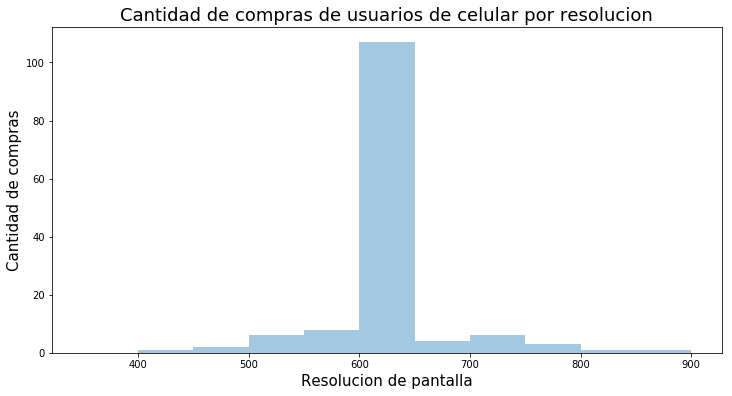

In [18]:
df_resoluciones_celular = datos_completo.loc[(datos_completo['resolution'] != 'multi')]
df_resoluciones_celular = df_resoluciones_celular.loc[(df_resoluciones_celular['device_types'] == 'Smartphone')]
df_resoluciones_celular = df_resoluciones_celular.loc[(df_resoluciones_celular['event'] == 'conversion')]
df_resoluciones_celular = df_resoluciones_celular.drop_duplicates(subset='person')
res_por_persona = df_resoluciones_celular['resolution'].astype(int)
res_por_persona = res_por_persona[res_por_persona <= 1000]
plt.subplots(figsize=(12,6))
l_bins = []
for x in range(4,10):
    l_bins.append(x*100-50)
    l_bins.append(x*100)
bp = sns.distplot(res_por_persona, bins=l_bins, kde=False)
bp.set_title("Cantidad de compras de usuarios de celular por resolucion", fontsize=18)
bp.set_xlabel("Resolucion de pantalla", fontsize=15)
bp.set_ylabel("Cantidad de compras", fontsize=15)

Text(0,0.5,'Cantidad de usuarios')

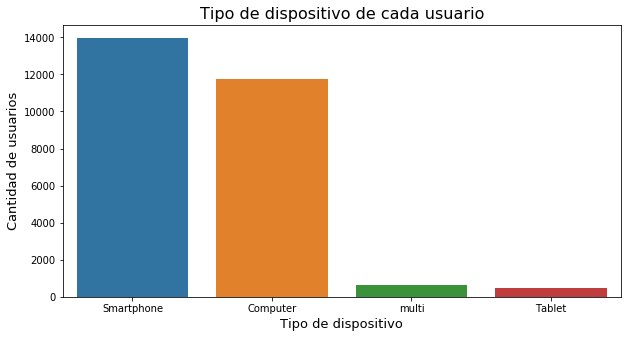

In [5]:
dispositivos = serie_persona_dispositivo.value_counts()
plt.subplots(figsize=(10,5))
bp = sns.barplot(x=dispositivos.index, y= dispositivos.values)
bp.set_title("Tipo de dispositivo de cada usuario", fontsize=16)
bp.set_xlabel("Tipo de dispositivo", fontsize=13)
bp.set_ylabel("Cantidad de usuarios", fontsize=13)

Text(0,0.5,'Cantidad de usuarios')

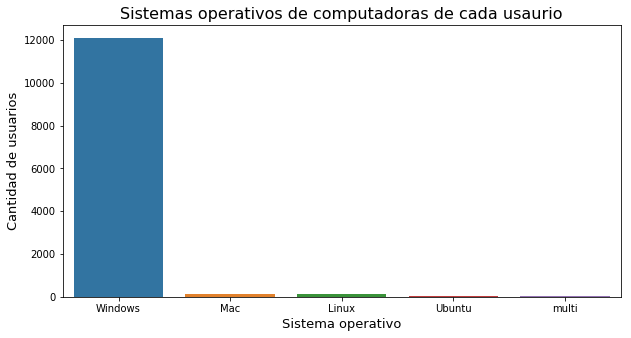

In [5]:
so_computadoras = serie_persona_so_computadora.value_counts()
plt.subplots(figsize=(10,5))
bp = sns.barplot(x=so_computadoras.index, y= so_computadoras.values)
bp.set_title("Sistemas operativos de computadoras de cada usaurio", fontsize=16)
bp.set_xlabel("Sistema operativo", fontsize=13)
bp.set_ylabel("Cantidad de usuarios", fontsize=13)

Text(0,0.5,'Cantidad de usuarios')

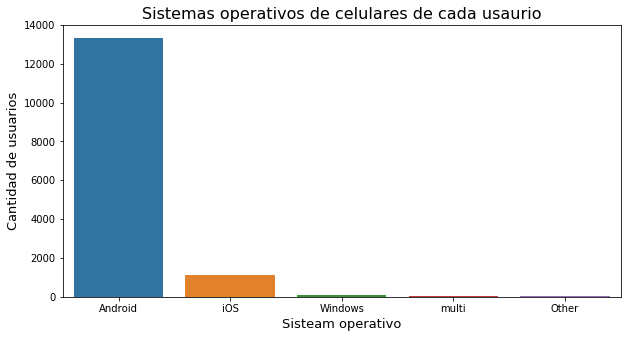

In [7]:
so_celulares = serie_persona_so_celular.value_counts()
plt.subplots(figsize=(10,5))
bp = sns.barplot(x=so_celulares.index, y= so_celulares.values)
bp.set_title("Sistemas operativos de celulares de cada usaurio", fontsize=16)
bp.set_xlabel("Sisteam operativo", fontsize=13)
bp.set_ylabel("Cantidad de usuarios", fontsize=13)

Text(0,0.5,'Cantidad de vistas')

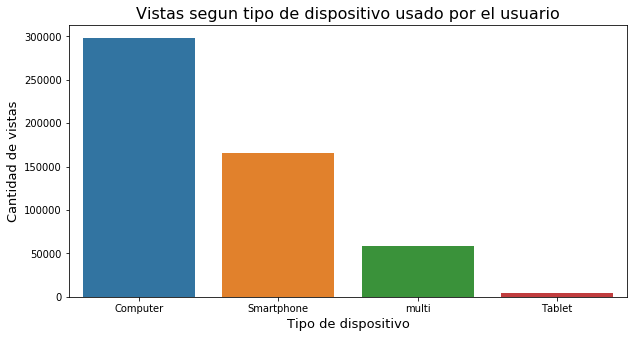

In [7]:
df_vistas = datos_completo.loc[(datos_completo['event'] == 'viewed product')]
vistas_tipo_dispositivo = df_vistas['device_types'].value_counts()
plt.subplots(figsize=(10,5))
bp = sns.barplot(x=vistas_tipo_dispositivo.index, y= vistas_tipo_dispositivo.values)
bp.set_title("Vistas segun tipo de dispositivo usado por el usuario", fontsize=16)
bp.set_xlabel("Tipo de dispositivo", fontsize=13)
bp.set_ylabel("Cantidad de vistas", fontsize=13)

Text(0,0.5,'Cantidad de ventas')

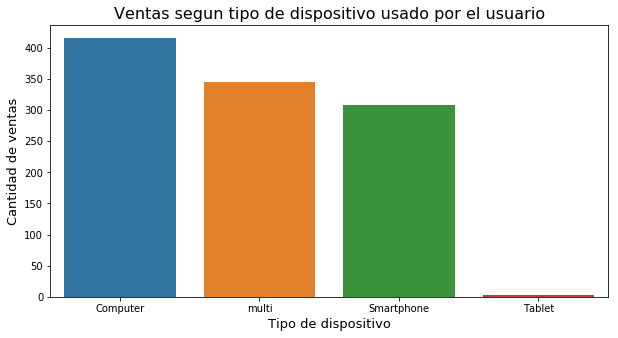

In [6]:
df_conversiones = datos_completo.loc[(datos_completo['event'] == 'conversion')]
conversiones_tipo_dispositivo = df_conversiones['device_types'].value_counts()
plt.subplots(figsize=(10,5))
bp = sns.barplot(x=conversiones_tipo_dispositivo.index, y= conversiones_tipo_dispositivo.values)
bp.set_title("Ventas segun tipo de dispositivo usado por el usuario", fontsize=16)
bp.set_xlabel("Tipo de dispositivo", fontsize=13)
bp.set_ylabel("Cantidad de ventas", fontsize=13)